In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.shape

(7043, 21)

In [26]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### Business Understanding
- 통신사 고객관리 데이터
- 고객의 인원수(가입자)가 가장 중요함
- 기존 고객 가입자의 이탈 방지, 신규 고객 유치
- 고객 이탈과 가장 관련 있는 요인 무엇인지 확인 ?

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [29]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [30]:
df.sort_values(by='TotalCharges')['TotalCharges']

5218       0.00
6670       0.00
6754       0.00
488        0.00
1082       0.00
         ...   
2187    8564.75
5347    8594.40
6768    8670.10
4586    8672.45
4610    8684.80
Name: TotalCharges, Length: 7043, dtype: float64

In [31]:
df.sort_values(by='TotalCharges')['TotalCharges'][936]  # Space 확인

np.float64(0.0)

In [32]:
df.loc[df['TotalCharges'] == ' ']['TotalCharges']  # Space 가 있는 ROW 찾기

Series([], Name: TotalCharges, dtype: float64)

In [33]:
len(df.loc[df['TotalCharges'] == ' ']['TotalCharges'])

0

### 빈 값 처리 방법
- 그냥 지우기
- 도메인 지식을 이용한 데이터 채워 넣기
- 평균 대체법
- 해당 Column을 Label로 두고 ML 학습한후 예측값을 채워 넣기

In [34]:
df['SeniorCitizen'].describe()

count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

In [35]:
# Dependents는 대표성이 있는가 ?
# 부양가족 있는 고객은 모두 TotalCharges가 빈칸인가 ?

df.loc[df['Dependents'] == 'Yes']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,0
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No,0
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No,0
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes,1
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,No,0
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0


In [36]:
len(df.loc[df['Dependents'] == 'Yes'])

2110

In [37]:
# tenure 는 대표성 있는가 ?
df.loc[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No,0


In [38]:
df.loc[df['tenure'] == 0, 'TotalCharges']  = 0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [40]:
df['TotalCharges']  = df['TotalCharges'].apply(lambda x: float(x)) # object type -> float type 변경)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [42]:
set(df['Churn'])   # no: 이탈 안함, yes: 이탈함

{'No', 'Yes'}

In [43]:
mapper = { 'Yes' : 1, 'No': 0 }
df['Churn_num'] = df['Churn'].map(mapper)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [44]:
len(set(df['tenure']))

73

In [45]:
# 평균값으로 대체
te_ch = df.groupby('tenure').agg({'Churn_num': 'mean'}).reset_index()
te_ch

,tenure,Churn_num
0,0,0.000000
1,1,0.619902
2,2,0.516807
3,3,0.470000
4,4,0.471591
...,...,...
68,68,0.090000
69,69,0.084211
70,70,0.092437
71,71,0.035294


<Axes: xlabel='tenure', ylabel='Churn_num'>

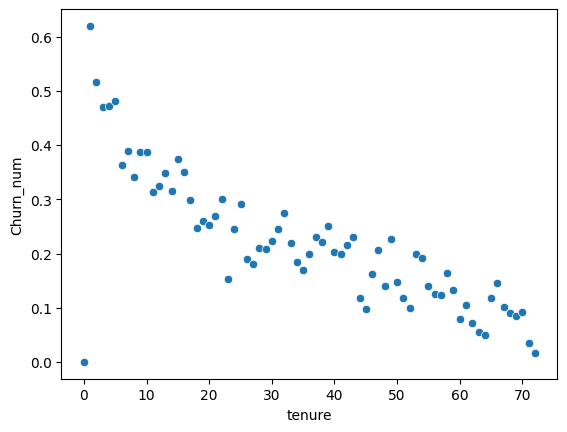

In [46]:
import seaborn as sns
sns.scatterplot(data=te_ch, x='tenure', y='Churn_num')


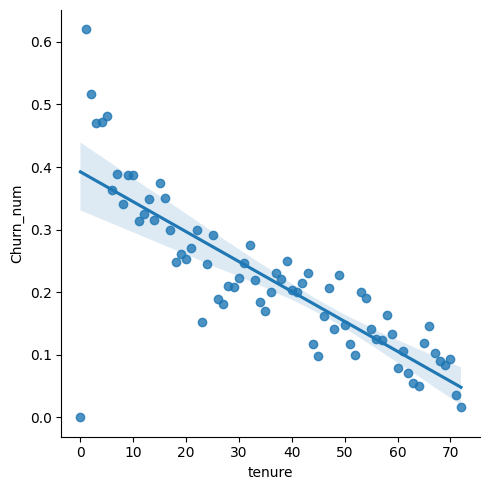

In [47]:
sns.lmplot(data=te_ch, x='tenure', y='Churn_num')     # 산점도 추세선

고객 이탈(Churn)과 고객 유지 기간(tenure) 사이의 관계를 시각화
1. 축 설명
- X축(tenure): 고객이 서비스를 이용한 기간(단위가 월)
- y축(Churn) : 고객 이탈 비율 또는 이탈 여부를 수치화한 값
2. 그래프 설명은?
- 고객의 가입 유지기간이 길수록 서비스 이탈이 낮아지고 있음.
- 추세선은 선형회귀선이며, 데이터의 전반적인 추세(음의 상관관계)를 보임
- 하늘색 그림자 영역은 회귀구간의 신뢰구간(Confidence interval)을 나타냄
3. 전체적인 의미
- 고객이 서비스를 오래 이용할수록 이탈 가능성이 낮아짐(충성고객 유지되고 있음)
- 즉, 신규 고객일수록 이탈 위험이 높고, 장기 고객은 이탈 위험이 적음

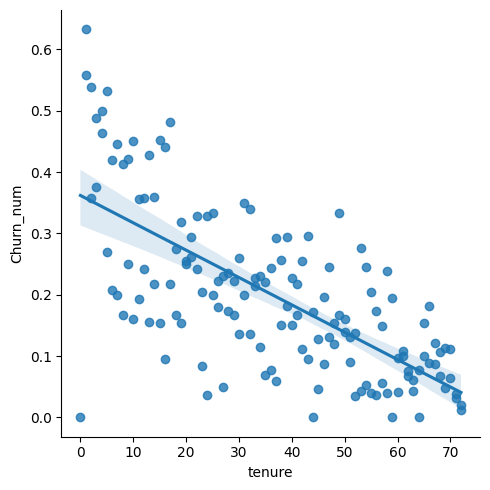

In [51]:
te_ch = df.groupby(['tenure', 'Dependents']).agg({'Churn_num': 'mean'}).reset_index()
te_ch
sns.lmplot(data=te_ch, x='tenure', y='Churn_num') 

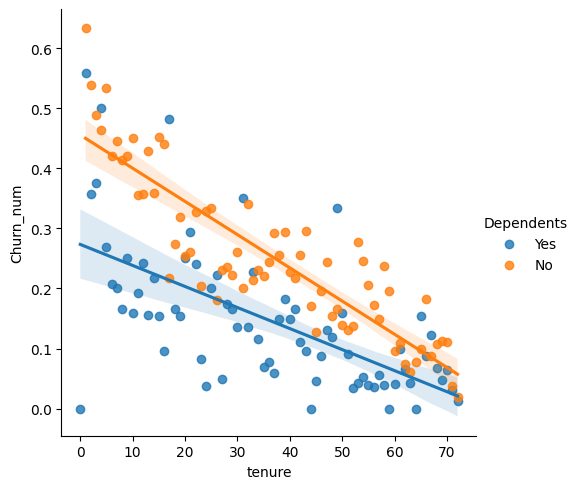

In [52]:
hue = 'Dependents'
te_ch = df.groupby(['tenure', 'Dependents']).agg({'Churn_num': 'mean'}).reset_index()
te_ch
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue) 

고객의 의존자 여부(Dependents)에 따라 고객 유지기간과 이탈률(Chun_num)간의 관계를
분리해서 보여주는 이중 회귀 분석 그래프
1. 축 설명과 변수
- X축(tenure): 고객이 서비스를 이용한 개월 수 나타내는 유지기간
- Y축(Chun_num): 고객 이탈 비율(0 ~ 1 사이 값으로 추정됨)
- 색상 : 고객이 의존자(부양가족)가 있는지 여부
- 파란색(yes): 부양자가 있는 고객
- 주황색(no) : 부양자가 없는 고객
2. 그래프 상세하게 해석
- 두 그룹 모두 Tenure(가입기간)이 길어질수록 이탈률이 낮아지는 음의 상관관계 보이고 있음
- 즉, 곡객이 서비스를 오래 이용할수록 이탈할 가능성이 낮아짐(다른 통신사 변경 안한다)
3. 의존자 여부에 따른 차이
| 구분                      | 이탈률 수준       | 회귀선 기울기     | 신뢰 구간               |
|---------------------------|-------------------|-------------------|--------------------------|
| 의존자 있음 (Yes, 파란색) | 전반적으로 낮음   | 완만하게 감소     | 신뢰 구간 좁고 안정적   |
| 의존자 없음 (No, 주황색) | 전반적으로 높음   | 가파르게 감소     | 신뢰 구간 넓음          |
- 해석 요점
    - 의존가 없는 고객은 초기에 이탈률이 높고, 시간이 지날수록 빠르게 떨어짐
    - 의존가가 있는 경우, 초기 이탈률이 낮고, 점진적으로 안정적인 유지를 하는 경향 높음
이는 의존자가 있는는 고객이 서비스에 더 오래 유지할 가능성이 높고, 부양가족 영향으로 서비스 안정성이 중요하기 때문에 계서 서비스를 유지함

4. 비지니스 관점 인사이트
- 이탈 방지 전략
    - 의존가 없는 신규 고객은 이탈 가능성이 매우 높으므로, 초기에 적극적인 케어와 혜택 제공으로 필요
    - 의존가 있는 경우에는 고객의 충성도가 높은 장기 고객으로 발전할 가능성이 높으므로, 장기 가입 혜택/패키지 제공이 효과적임


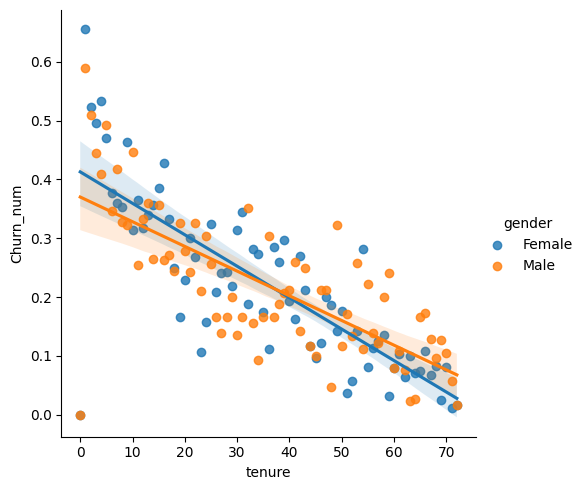

In [54]:
hue = 'gender'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue) 

성별(Gender)에 따른 고객 서비스 유지 기간(Tenure)과 이탈률(Chun_num)간의 관계를
시각화한 이중 회귀 분석 그래프
1. 축 설명과 변수
- X축(tenure): 고객이 서비스를 이용한 개월 수 나타내는 유지기간
- Y축(Chun_num): 고객 이탈 비율(0 ~ 1 사이 값으로 추정됨)
- 색상 :
- 파란색 : Female(여성 고객)
- 주황색 : Male(남성 고객)
2. 그래프 상세 분석
- 공통적인 방향성
    - 이용기간이 늘어날 수록 이탈률(Chun_num) 감소
    - 즉, 성별과 관계없이 고객 서비스 가입 기간이 길수록 이탈가능성이 낮아짐(음의 상관관계가 존재)
- 성별에 따른 이탈률 차이 
| 성별           | 이탈률 수준   | 회귀선 기울기       | 신뢰 구간               |
|----------------|---------------|----------------------|--------------------------|
| 여성 (Female)  | 다소 높음     | 비교적 가파른 감소   | 신뢰 구간 약간 넓음     |
| 남성 (Male)    | 다소 낮음     | 점진적인 감소        | 신뢰 구간 좁고 안정적   |

- 초기에는 여성 고객의 이탈률이 약간 더 높게 나타나는 경향
    그러나 서비스 유지기간이 길어짐에 따라 성별간의 이탈률 차이는 거의 사라지며 두 그래프는 수렴
- 남성 고객이 상대적ㄴ으로 조금 더 안정적인 유지 성향을 보이지만, 차이는 크지않음

3. 비지니스 인사이트
- 성별간 차이는 존재하나 아탈률 차이는 크지 않음 -> 성별은 고객 이탈 예측 변수가 아닌것으로 해석할 수 있음
- 하지만 초기 여성고객 이탈율이 조금 더 높기 때문에, 신규 여성 고객을 대상으로 서비스 체험 전략이 효과적일 수 있음

4. 결론 요약
- 전체적으로 성별과 무관하게 서비스 가입 기간이 길어 질수록 이탈률은 감소함.
- 성별에 따른 이탈률 차이는 존재하나 영향은 미미함.
- 실무적으로 설별 보다는 가입기간에 따른 다른 변수(예: Dependents, 계약 유형 등 )에 더 집중하는 것이 좋음

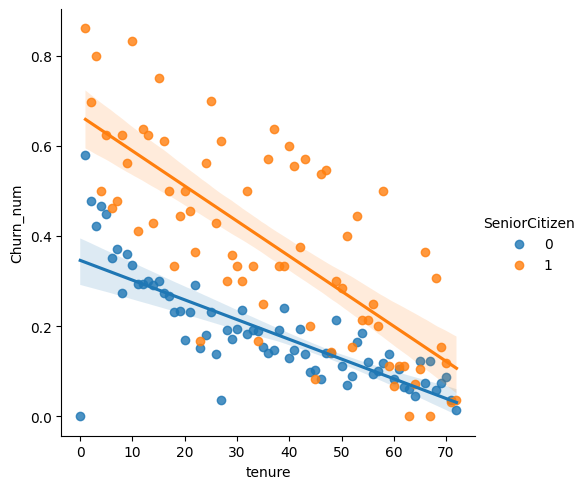

In [57]:
hue = 'SeniorCitizen'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue) 

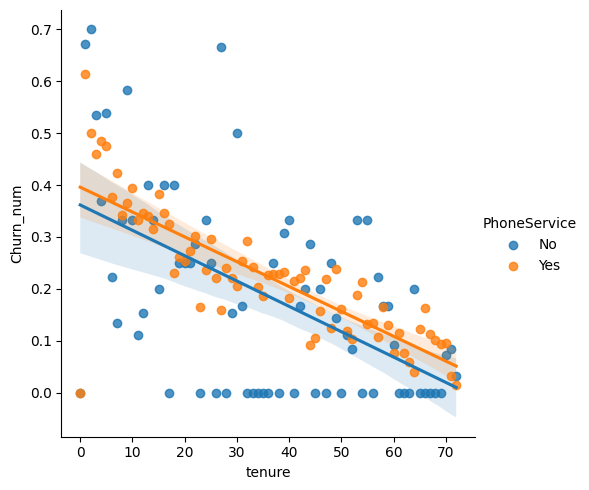

In [59]:
hue = 'PhoneService'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue) 

In [68]:
df['tenure'].value_counts().sort_values()

tenure
0      11
36     50
44     51
39     56
28     57
     ... 
4     176
3     200
2     238
72    362
1     613
Name: count, Length: 73, dtype: int64

In [76]:
df.loc[df['tenure']==18]['PhoneService'].value_counts()

PhoneService
Yes    87
No     10
Name: count, dtype: int64

In [77]:
set(df['MultipleLines'])

{'No', 'No phone service', 'Yes'}

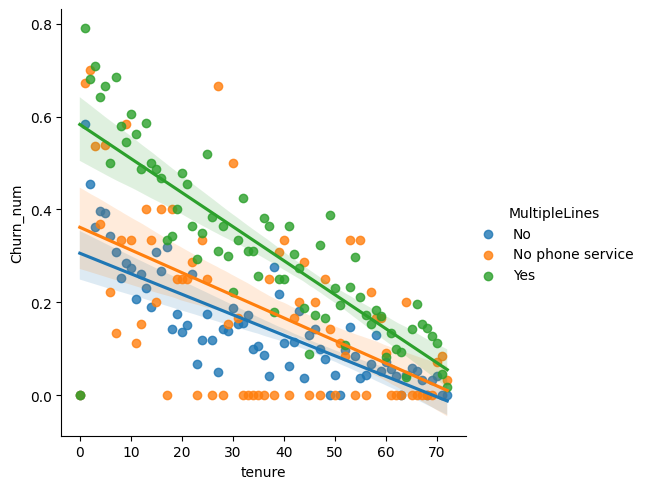

In [78]:
hue = 'MultipleLines'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue) 

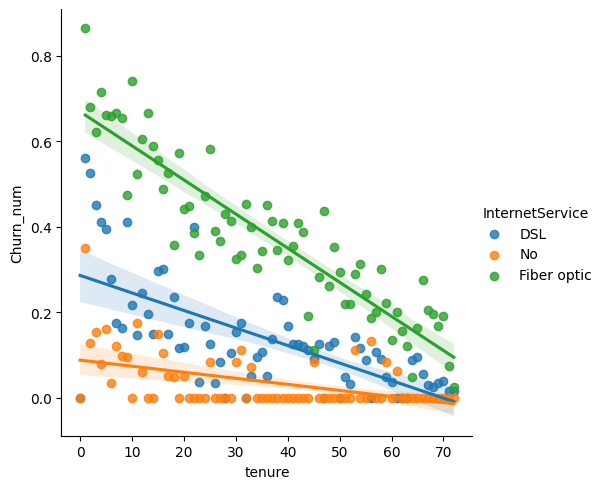

In [80]:
hue = 'InternetService'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue) 

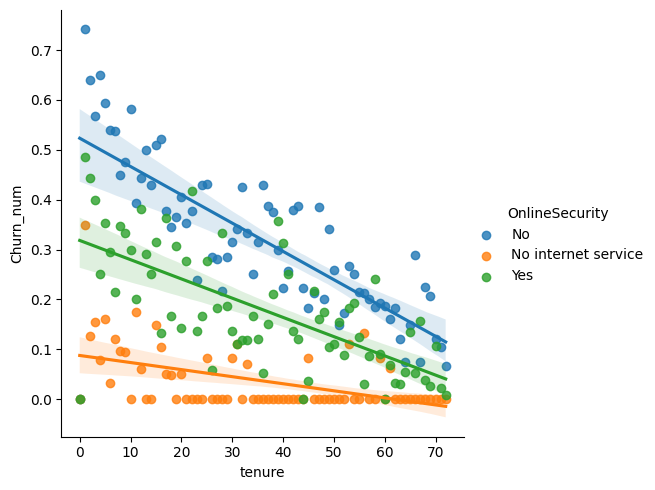

In [82]:
hue = 'OnlineSecurity'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue) 

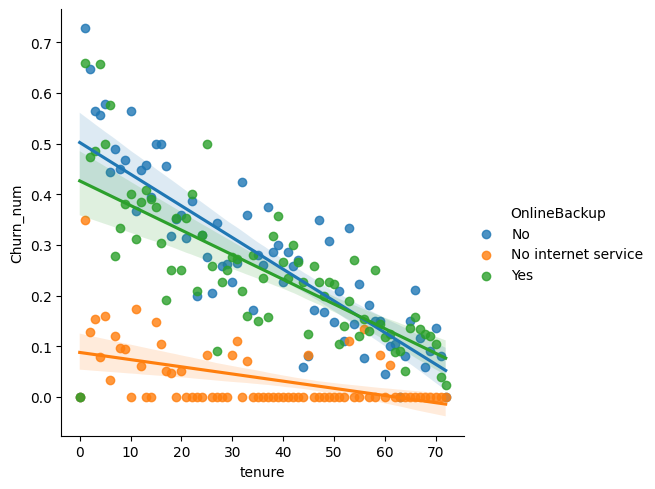

In [84]:
hue =  'OnlineBackup'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue) 

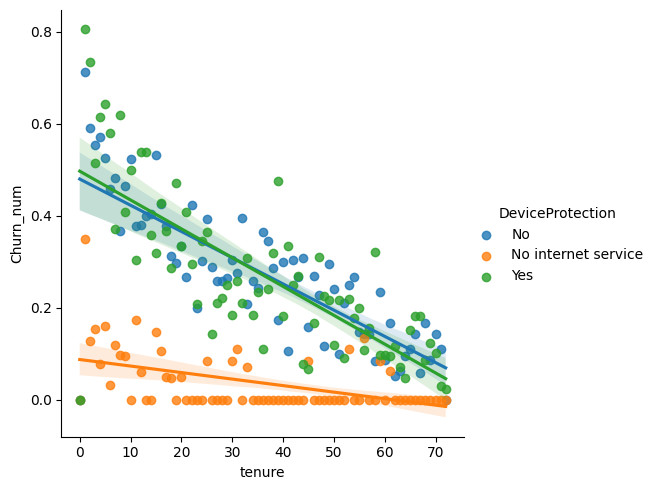

In [86]:
hue =  'DeviceProtection'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue) 

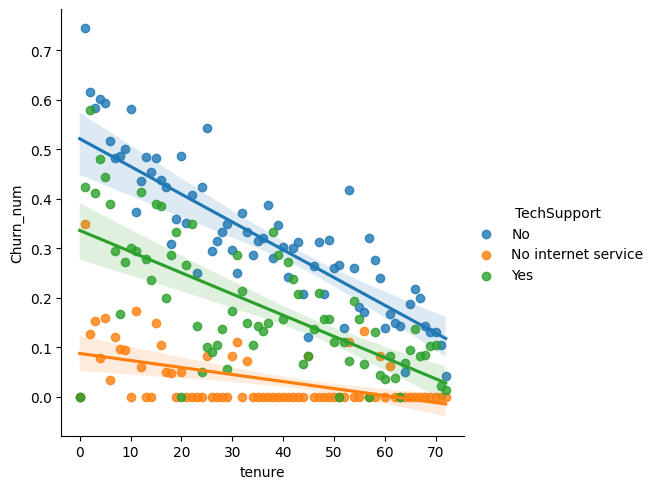

In [87]:
hue =   'TechSupport'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue) 

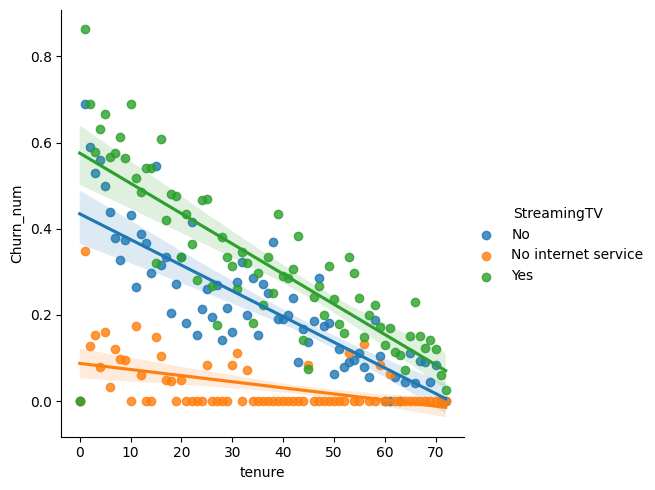

In [89]:
hue =  'StreamingTV'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue) 

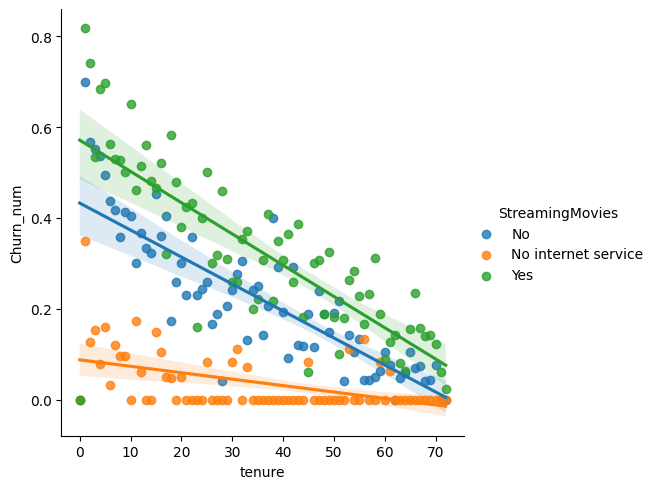

In [90]:
hue =  'StreamingMovies'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue) 

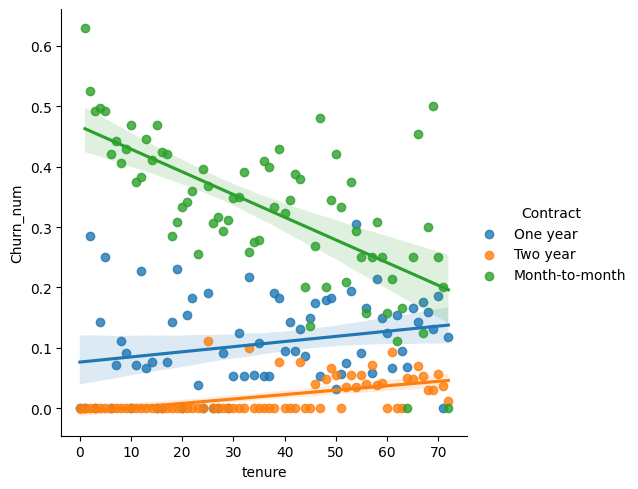

In [92]:
hue =  'Contract'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue) 

In [93]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_num'],
      dtype='object')

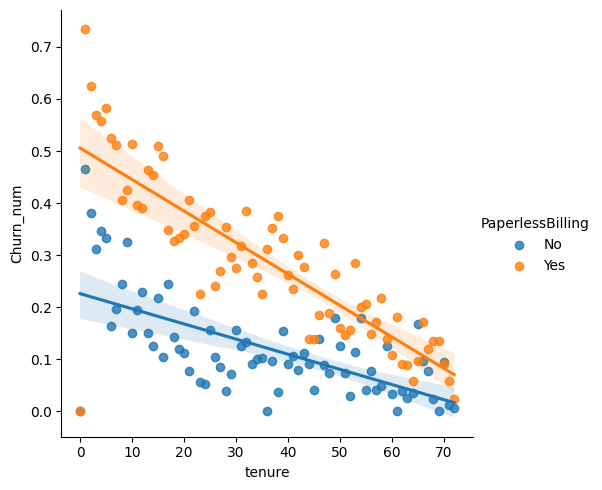

In [94]:
hue =  'PaperlessBilling'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue) 

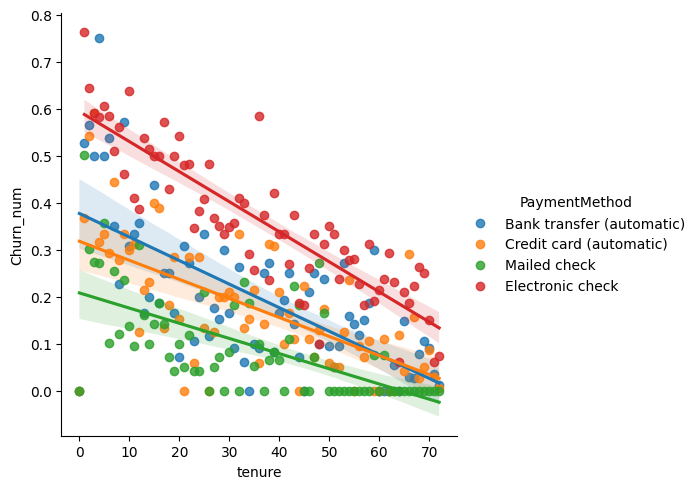

In [95]:
hue =  'PaymentMethod'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue) 

### Data Preparation
- 이상치 판별과 처리
- scaling : 범위를 조정
- 경우의 수 coloumn 처리
- 교차 검증

### 이상치(Outlier)
- 기준을 정해서 기준선 밖에 데이터 있으면 이상치로 판단
- IQR(Inter Qualtile Range), MAD, MCOD, Hoteling's T2, SPE

In [97]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [106]:
tgt_col = 'TotalCharges'
desc = df.describe()[tgt_col]

In [107]:
IQR = 1.5 * (desc['75%'] - desc['25%'])   # 1.5 학술적인 상수
upper_lim = desc['75%'] + IQR
lower_lim = desc['25%'] - IQR

In [108]:
df.loc[( df[tgt_col] > upper_lim) | (df[tgt_col] < lower_lim )]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num


In [109]:
tgt_col = 'SeniorCitizen'
desc = df.describe()[tgt_col]

IQR = 1.5 * (desc['75%'] - desc['25%'])   # 1.5 학술적인 상수
upper_lim = desc['75%'] + IQR
lower_lim = desc['25%'] - IQR
df.loc[( df[tgt_col] > upper_lim) | (df[tgt_col] < lower_lim )]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No,0
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No,0
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No,0
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No,0
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No,0
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No,0
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,1


In [116]:
# TotalCharge를 대상으로 평균으로부터 표준편가 2.5에 해당하는 값들의 합
tgt_col = 'TotalCharges'
desc = df.describe()[tgt_col]

upper_lim = desc['mean'] + (2.5 * desc['std'])
lower_lim = desc['mean'] - (2.5 * desc['std'])

sum(df.loc[(df[tgt_col] > upper_lim) | (df[tgt_col] < lower_lim )][tgt_col])

740692.15

### Scailing
- 변수의 범위를 조정해주는 것
- 단위가 큰 column이 단위가 작은 column에 비래 학습 단계에 미치는 영향이 큰경우
- 그래프를 그릴때, 같은 축을 공유해 시각하는 경우
- 자릿수가 작야야 속도가 빠른 경우
- min-max > standard > robust  : 이상치를 고려하지 않음, 이상치가 있는 경우 min-max 추천 하지 않음
- robust는 이상치의 영향을 덜 받음. 

scale =  (x - min) / (max - min)

In [119]:
minus_min = df['tenure'] - min(df['tenure'])
minus_min.min()

np.int64(0)

In [120]:
scaled = minus_min / max(minus_min)
scaled.describe()

count    7043.000000
mean        0.449599
std         0.341104
min         0.000000
25%         0.125000
50%         0.402778
75%         0.763889
max         1.000000
Name: tenure, dtype: float64

In [122]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_num'],
      dtype='object')

In [125]:
# 'tenure', 'MonthlyCharges', 'TotalCharges'
# tenure_mm_scal, MonthlyCharges_mm_scal, TotalCharges_mm_scal

scal_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for tgt_col in scal_cols:
    minus_min = df[tgt_col] - min(df[tgt_col])
    df[tgt_col + '_mm_scal'] = minus_min / max(minus_min)

df[['tenure_mm_scal', 'MonthlyCharges_mm_scal', 'TotalCharges_mm_scal']].describe()

,tenure_mm_scal,MonthlyCharges_mm_scal,TotalCharges_mm_scal
count,7043.000000,7043.000000,7043.000000
mean,0.449599,0.462803,0.262497
std,0.341104,0.299403,0.261007
min,0.000000,0.000000,0.000000
25%,0.125000,0.171642,0.045891
50%,0.402778,0.518408,0.160574
75%,0.763889,0.712438,0.436003
max,1.000000,1.000000,1.000000


In [127]:
import numpy as np

In [128]:
# 'tenure', 'MonthlyCharges', 'TotalCharges'
# tenure_std_scal, MonthlyCharges_std_scal, TotalCharges_std_scal

scal_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for tgt_col in scal_cols:
    minus_mean = df[tgt_col] - np.mean(df[tgt_col])
    df[tgt_col + '_std_scal'] = minus_mean / np.std(minus_mean)

df[['tenure_std_scal', 'MonthlyCharges_std_scal', 'TotalCharges_std_scal']].describe()

,tenure_std_scal,MonthlyCharges_std_scal,TotalCharges_std_scal
count,7.043000e+03,7.043000e+03,7.043000e+03
mean,-2.421273e-17,-6.406285e-17,-3.783239e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.318165e+00,-1.545860e+00,-1.005780e+00
25%,-9.516817e-01,-9.725399e-01,-8.299464e-01
50%,-1.372744e-01,1.857327e-01,-3.905282e-01
75%,9.214551e-01,8.338335e-01,6.648034e-01
max,1.613701e+00,1.794352e+00,2.825806e+00


In [129]:
### 경우의 수 column 처리
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_num',
       'tgt_col_mm_scal', 'tenure_mm_scal', 'MonthlyCharges_mm_scal',
       'TotalCharges_mm_scal', 'tenure_std_scal', 'MonthlyCharges_std_scal',
       'TotalCharges_std_scal'],
      dtype='object')

In [ ]:
# YES, NO Column 처리
'tenure_mm_scal', 'MonthlyCharges_mm_scal', 'TotalCharges_mm_scal',    - 0 ~ 1 범위
'tenure_std_scal', 'MonthlyCharges_std_scal', 'TotalCharges_std_scal'

In [130]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [131]:
print(set(df['Partner']))
print(set(df['Dependents']))
print(set(df['PhoneService']))
print(set(df['PaperlessBilling']))

{'No', 'Yes'}
{'No', 'Yes'}
{'No', 'Yes'}
{'No', 'Yes'}


In [132]:
# 'Partner', 'Dependents', 'PhoneService',  'PaperlessBilling'
# 'Partner_num', 'Dependents_num', 'PhoneService_num',  'PaperlessBilling_num'

yes_no_cols = ['Partner', 'Dependents', 'PhoneService',  'PaperlessBilling']

for tgt in yes_no_cols:
    mapper = { 'No': 0, 'Yes': 1}
    df[tgt + '_num'] = df[tgt].map(mapper)

df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [133]:
set(df['InternetService'])

{'DSL', 'Fiber optic', 'No'}

In [134]:
mapper = {'DSL' : 0.5, 'Fiber optic': 1, 'No' : 0}
df['InternetSpeed'] = df['InternetService'].map(mapper)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,tgt_col_mm_scal,tenure_mm_scal,MonthlyCharges_mm_scal,TotalCharges_mm_scal,tenure_std_scal,MonthlyCharges_std_scal,TotalCharges_std_scal,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7.043000e+03,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,0.262497,0.449599,0.462803,0.262497,-2.421273e-17,-6.406285e-17,-3.783239e-17,0.483033,0.299588,0.903166,0.592219,0.611458
std,0.368612,24.559481,30.090047,2266.794470,0.441561,0.261007,0.341104,0.299403,0.261007,1.000071e+00,1.000071e+00,1.000071e+00,0.499748,0.458110,0.295752,0.491457,0.389438
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.318165e+00,-1.545860e+00,-1.005780e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.045891,0.125000,0.171642,0.045891,-9.516817e-01,-9.725399e-01,-8.299464e-01,0.000000,0.000000,1.000000,0.000000,0.500000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.160574,0.402778,0.518408,0.160574,-1.372744e-01,1.857327e-01,-3.905282e-01,0.000000,0.000000,1.000000,1.000000,0.500000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,0.436003,0.763889,0.712438,0.436003,9.214551e-01,8.338335e-01,6.648034e-01,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.613701e+00,1.794352e+00,2.825806e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_num',
       'tgt_col_mm_scal', 'tenure_mm_scal', 'MonthlyCharges_mm_scal',
       'TotalCharges_mm_scal', 'tenure_std_scal', 'MonthlyCharges_std_scal',
       'TotalCharges_std_scal', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed'],
      dtype='object')

In [160]:
interested = ['SeniorCitizen', 'Churn_num', 
'tenure_mm_scal', 'MonthlyCharges_mm_scal', 'TotalCharges_mm_scal',
'Partner_num', 'Dependents_num', 'PhoneService_num', 'PaperlessBilling_num',
'InternetSpeed']
df[interested].to_csv('test3_modiify.csv', index=False)

In [161]:
df = pd.read_csv('test3_modiify.csv')
df.head().T

,0,1,2,3,4
SeniorCitizen,0.000000,0.000000,0.000000,0.000000,0.000000
Churn_num,0.000000,0.000000,1.000000,0.000000,1.000000
tenure_mm_scal,0.013889,0.472222,0.027778,0.625000,0.027778
MonthlyCharges_mm_scal,0.115423,0.385075,0.354229,0.239303,0.521891
TotalCharges_mm_scal,0.003437,0.217564,0.012453,0.211951,0.017462
Partner_num,1.000000,0.000000,0.000000,0.000000,0.000000
Dependents_num,0.000000,0.000000,0.000000,0.000000,0.000000
PhoneService_num,0.000000,1.000000,1.000000,0.000000,1.000000
PaperlessBilling_num,1.000000,0.000000,1.000000,0.000000,1.000000
InternetSpeed,0.500000,0.500000,0.500000,0.500000,1.000000


In [162]:
df.columns

Index(['SeniorCitizen', 'Churn_num', 'tenure_mm_scal',
       'MonthlyCharges_mm_scal', 'TotalCharges_mm_scal', 'Partner_num',
       'Dependents_num', 'PhoneService_num', 'PaperlessBilling_num',
       'InternetSpeed'],
      dtype='object')

In [163]:
features = ['SeniorCitizen', 'tenure_mm_scal',
       'MonthlyCharges_mm_scal', 'TotalCharges_mm_scal',  'Partner_num',
       'Dependents_num', 'PhoneService_num', 'PaperlessBilling_num',
       'InternetSpeed']
label = 'Churn_num'

In [164]:
X, y = df[features], df[label]

In [165]:
X.shape

(7043, 9)

In [166]:
y.shape

(7043,)

### 교차 검증
- test 셋이 너무 적으면 학습된 결과가 불안정함 -> 교차 검증을 이용해 안정적임 검증 점수 획득
- train 셋을 조금씩 떼어내 평가하는 과정을 여러번 반복하고 점수를 평균을 구해서 최종 검증 점수 획득

### 교차 검증 순서
1. row의 순서를 섞음
2. 데이터 셋을 k 등분(K-fold cross validation)
3. 첫번째 데이터 셋을 test(검증용)로, 나머지를 train(학습용)으로 사용
4. train 데이터로 학습하고, test 데이터로 채점 -> 점수확인
5. 두번째 데이터 셋을 test로 하고, 3, 4 단계를 k번 반복
6. 평가지수 덤수가 k개 생성됨 -> 평균(cv-score)

In [167]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.ensemble import RandomForestClassifier as rf
import numpy as np

In [168]:
model = rf()
cvs(model, X, y, scoring='precision', cv=5)

array([0.5794702 , 0.61616162, 0.57039711, 0.60666667, 0.61461794])

In [169]:
np.mean(cvs(model, X, y, scoring='precision', cv=5))

np.float64(0.5954607672426613)

### 지도/ 비지도 학습
- 지도(Supervised) 학습
    - 정답이 있는 데이터로 학습하는 방식
    - feature - labek 관계 패턴 학습
    - 사례 : 분류, 회귀
-----------------
- 비지도(Unsupervised) 학습
    - 정답이 없는 데이터로 학습하는 방식
    - feature 관계 패턴 학습
    - 비지도 학습의 알고리즘들은 목적이 정해져 있음.
    - 사례: 군집화, 차원 축소

### 군집(Clustering) 알고리즘
- 데이터를 여러 그룹으로 묶음(유사한 row 끼리 그룹화)

In [171]:
from sklearn.cluster import KMeans

In [172]:
features = ['SeniorCitizen', 'tenure_mm_scal',
       'MonthlyCharges_mm_scal', 'TotalCharges_mm_scal',  'Partner_num',
       'Dependents_num', 'PhoneService_num', 'PaperlessBilling_num',
       'InternetSpeed']
label = 'Churn_num'
X, y = df[features], df[label]

In [173]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [174]:
model.labels_

array([1, 3, 1, ..., 0, 1, 1], shape=(7043,), dtype=int32)

In [175]:
df['cluster'] = model.labels_
df.head().T

,0,1,2,3,4
SeniorCitizen,0.000000,0.000000,0.000000,0.000000,0.000000
Churn_num,0.000000,0.000000,1.000000,0.000000,1.000000
tenure_mm_scal,0.013889,0.472222,0.027778,0.625000,0.027778
MonthlyCharges_mm_scal,0.115423,0.385075,0.354229,0.239303,0.521891
TotalCharges_mm_scal,0.003437,0.217564,0.012453,0.211951,0.017462
Partner_num,1.000000,0.000000,0.000000,0.000000,0.000000
Dependents_num,0.000000,0.000000,0.000000,0.000000,0.000000
PhoneService_num,0.000000,1.000000,1.000000,0.000000,1.000000
PaperlessBilling_num,1.000000,0.000000,1.000000,0.000000,1.000000
InternetSpeed,0.500000,0.500000,0.500000,0.500000,1.000000


In [176]:
# 각 그룹별  이탈률 확인
df.groupby('cluster').agg({label: 'mean'})

,Churn_num
cluster,
0,0.202614
1,0.381367
2,0.114407
3,0.211142


In [177]:
np.mean(df[label])

np.float64(0.2653698707936959)

In [178]:
# 이탈률이 가장 낮은 그룹(2)의 특성
df.loc[df['cluster'] == 2].describe().T['mean'].reset_index()

,index,mean
0,SeniorCitizen,0.091808
1,Churn_num,0.114407
2,tenure_mm_scal,0.577331
3,MonthlyCharges_mm_scal,0.362968
4,TotalCharges_mm_scal,0.280904
5,Partner_num,0.997881
6,Dependents_num,0.607345
7,PhoneService_num,0.896186
8,PaperlessBilling_num,0.000000
9,InternetSpeed,0.435028


<Axes: xlabel='mean', ylabel='index'>

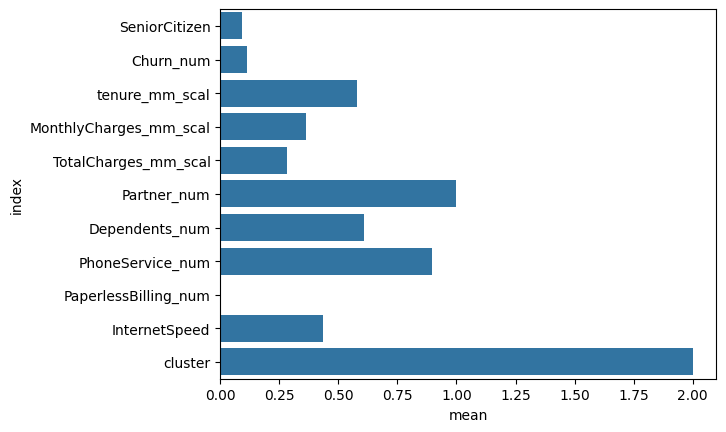

In [180]:
for_plot = df.loc[df['cluster'] == 2].describe().T['mean'].reset_index()
sns.barplot(data=for_plot, x='mean', y='index')

<Axes: xlabel='mean', ylabel='index'>

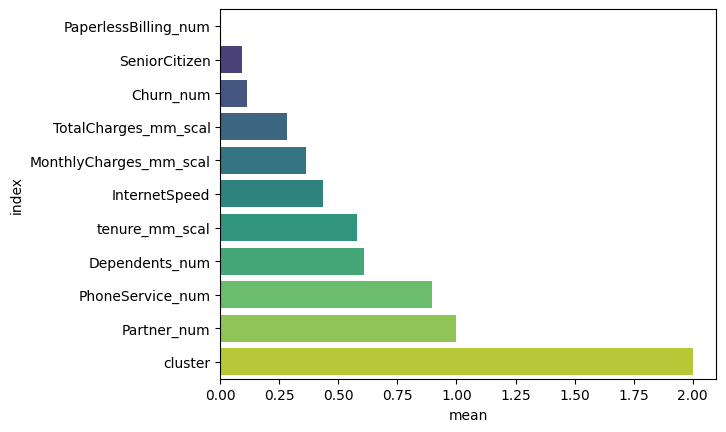

In [181]:
for_plot = df.loc[df['cluster'] == 2].describe().T['mean'].reset_index()
sns.barplot(data=for_plot.sort_values(by='mean'), x='mean', y='index', palette='viridis', hue='index')

<Axes: xlabel='mean', ylabel='index'>

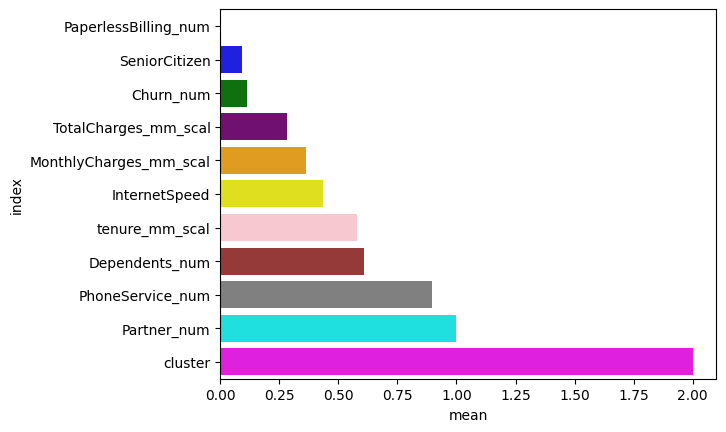

In [182]:
for_plot = df.loc[df['cluster'] == 2].describe().T['mean'].reset_index()
# 색상을 직접 지정하는 경우
colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'pink', 'brown', 'gray', 'cyan', 'magenta']
sns.barplot(data=for_plot.sort_values(by='mean'), x='mean', y='index', palette=colors, hue='index')

<Axes: xlabel='mean', ylabel='index'>

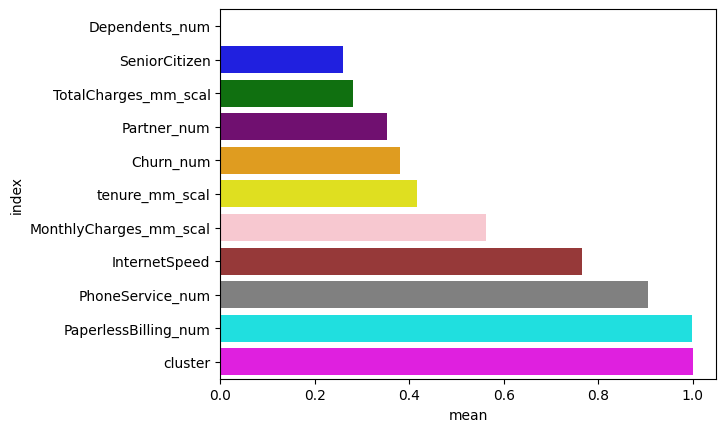

In [183]:
for_plot = df.loc[df['cluster'] == 1].describe().T['mean'].reset_index()
# 색상을 직접 지정하는 경우
colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'pink', 'brown', 'gray', 'cyan', 'magenta']
sns.barplot(data=for_plot.sort_values(by='mean'), x='mean', y='index', palette=colors, hue='index')

### 그룹화 할 때, 군집의 개수를 지정하는 방법
- 군집의 개수를 미리 알고 있는 경우
- 실루엣 지표등 이상적인 그룹과 그렇지 않은 그룹일때 수치값 비교가 가능한 평가지표를 이용
- 그래프를 그려서 확인(scree plot, elbow method)

In [184]:
from sklearn.metrics import silhouette_score as sil

In [185]:
df.columns

Index(['SeniorCitizen', 'Churn_num', 'tenure_mm_scal',
       'MonthlyCharges_mm_scal', 'TotalCharges_mm_scal', 'Partner_num',
       'Dependents_num', 'PhoneService_num', 'PaperlessBilling_num',
       'InternetSpeed', 'cluster'],
      dtype='object')

In [186]:
features = ['TotalCharges_mm_scal', 'tenure_mm_scal', 'MonthlyCharges_mm_scal']

model = KMeans(n_clusters=3)
model.fit(df[features])

KMeans(n_clusters=3)

In [187]:
sil_score = sil(df[features], model.labels_)
sil_score

np.float64(0.4469312565868967)

In [188]:
score_ls = []

for i in range(2, 10):
    model = KMeans(n_clusters=i)
    model.fit(df[features])
    sil_score = sil(df[features], model.labels_)
    score_dict = {'num_cluster': i, 'sil': sil_score}
    score_ls.append(score_dict)

In [189]:
score_df = pd.DataFrame(score_ls)
score_df.sort_values(by='sil', ascending=False)

,num_cluster,sil
2,4,0.469869
0,2,0.464262
1,3,0.447319
3,5,0.446365
5,7,0.429576
4,6,0.428239
7,9,0.424657
6,8,0.421472


In [190]:
model.inertia_   # elbow 값

151.8129828838587

In [191]:
score_ls = []

for i in range(2, 10):
    model = KMeans(n_clusters=i)
    model.fit(df[features])
    sil_score = sil(df[features], model.labels_)
    elbow_score = model.inertia_ 
    score_dict = {'num_cluster': i, 'sil': sil_score, 'elbow': elbow_score}
    score_ls.append(score_dict)

In [192]:
score_df = pd.DataFrame(score_ls)
score_df.sort_values(by='sil', ascending=False)

,num_cluster,sil,elbow
2,4,0.469986,381.015976
0,2,0.464781,918.721541
3,5,0.446164,289.833288
1,3,0.445404,596.706618
4,6,0.429898,252.270202
5,7,0.429894,206.254995
7,9,0.424894,151.811051
6,8,0.394503,195.833594


<Axes: xlabel='num_cluster', ylabel='elbow'>

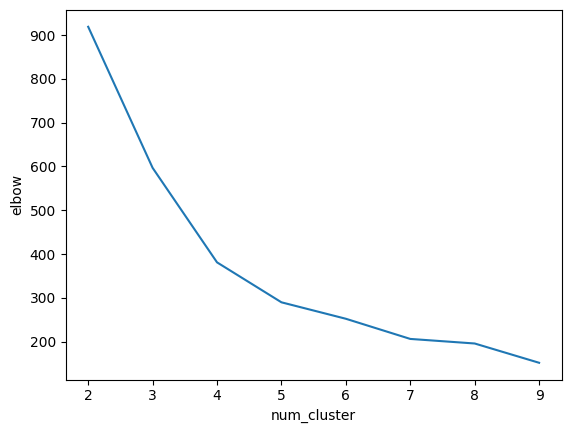

In [194]:
sns.lineplot(data=score_df, x='num_cluster', y='elbow')

### 차원 축소(Dimentionality Reduction)